In [ ]:
!pip install geopandas
import geopandas

In [ ]:
!pip install contextily
import contextily as ctx

In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Com01012021_g")
parchi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon.zip")
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g")
lombardia = regioni[regioni.DEN_REG == "Lombardia"]

1. visualizzi i parchi di Milano e i comuni che vi fanno parte

In [ ]:
milano = comuni[comuni.COMUNE =="Milano"]
parchi_milano = parchi[parchi.intersects(milano.geometry.squeeze())]
comuni_parchi = comuni[comuni.intersects(parchi_milano.unary_union)]

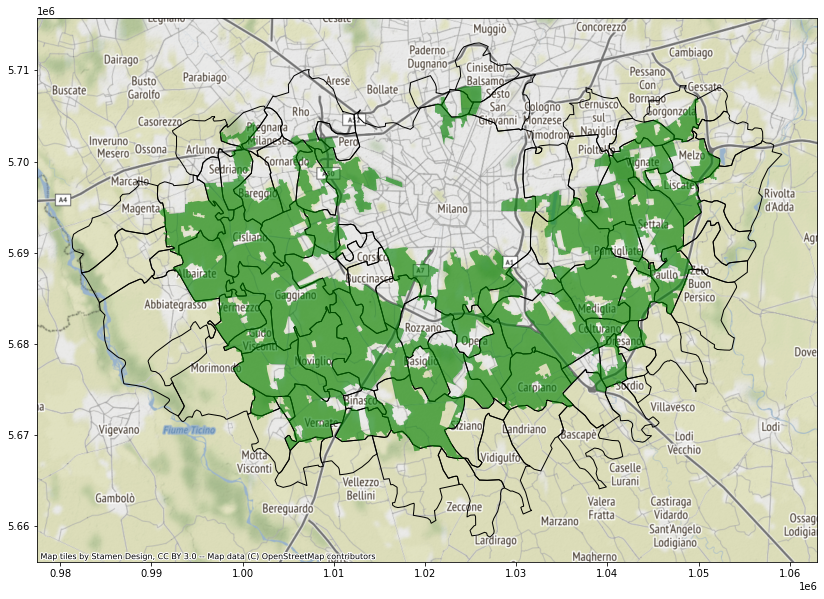

In [ ]:
ax = comuni_parchi.to_crs(epsg=3857).plot(figsize = (20,10), facecolor = "none", edgecolor = "k")
parchi_milano.to_crs(epsg=3857).plot(ax = ax, alpha = 0.6, facecolor = "green")
ctx.add_basemap(ax)

Visualizzare i comuni confinanti con Milano

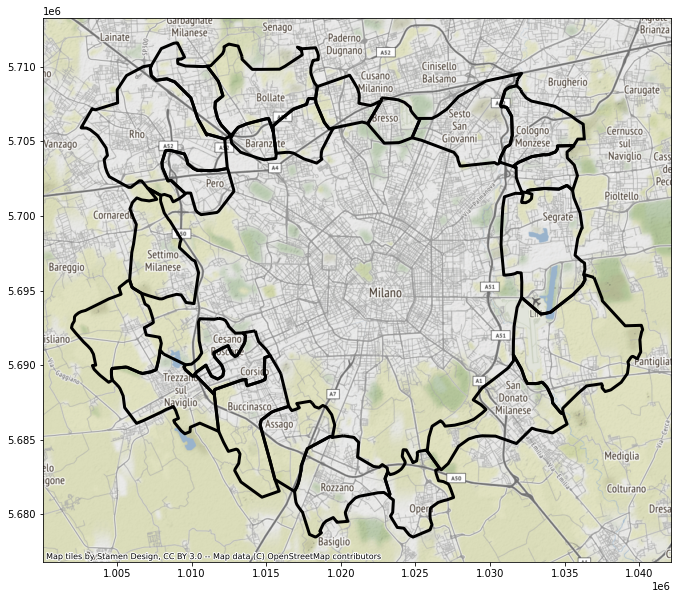

In [ ]:
comuni_limitrofi = comuni[comuni.touches(milano.geometry.squeeze())]
ax = comuni_limitrofi.to_crs(epsg=3857).plot(figsize = (20,10), facecolor = "none", edgecolor = "k", linewidth = 3)
ctx.add_basemap(ax)

trovare il comune più esteso confinante con Milano

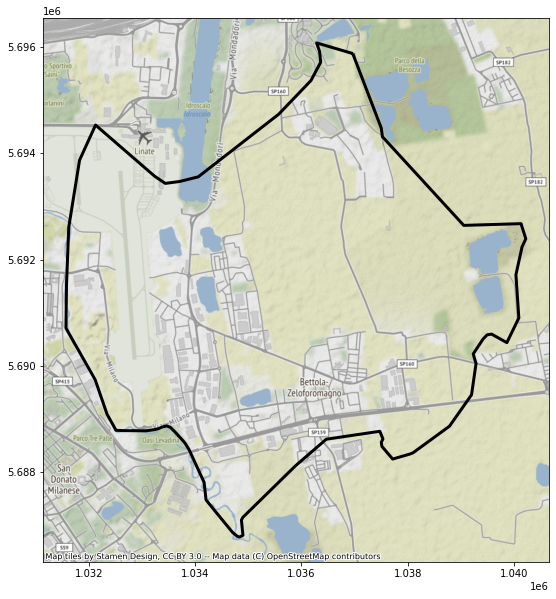

In [ ]:
comune_piu_esteso = comuni_limitrofi[comuni_limitrofi.Shape_Area == comuni_limitrofi.Shape_Area.max()]
ax = comune_piu_esteso.to_crs(epsg=3857).plot(figsize = (20,10), facecolor = "none", edgecolor = "k", linewidth = 3)
ctx.add_basemap(ax)

2. analogo al primo esercizio ma tracciando sulla mappa solo i quartieri di Milano attraversati da parchi (e non tutta la città)


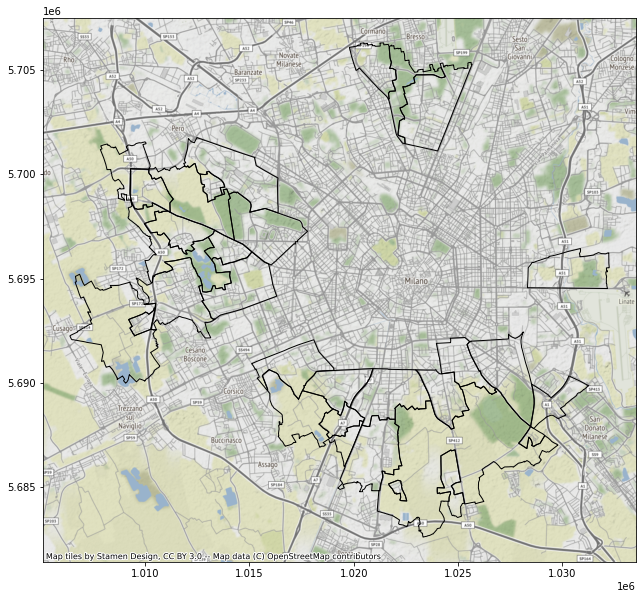

In [ ]:
quartieri_parchi = quartieri[quartieri.intersects(parchi_milano.to_crs(epsg=4326).unary_union)]
ax = quartieri_parchi.to_crs(epsg=3857).plot(figsize = (20,10), facecolor = "none", edgecolor = "k")
ctx.add_basemap(ax)

3  dato il nome di un parco, avere la mappa del parco con i comuni che lo ospitano

Inserisci il nome del parco: Parco Nord Milano


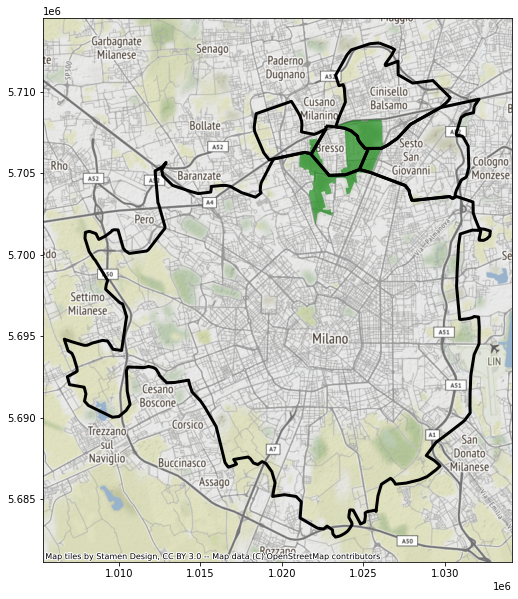

In [ ]:
parco = input("Inserisci il nome del parco: ")
mappa_parco = parchi[parchi.NOME == parco]
comuni_parco = comuni[comuni.intersects(mappa_parco.geometry.squeeze())]

if mappa_parco.count().values[0] != 0:
  ax = mappa_parco.to_crs(epsg=3857).plot(figsize=(20,10), alpha = 0.6, facecolor = "green")
  comuni_parco.to_crs(epsg=3857).plot(ax = ax, edgecolor = "k", facecolor = "none", linewidth=3)
  ctx.add_basemap(ax)
else:
  print("Il parco non si trova in Lombardia")

4. dato il nome di un parco, avere la mappa del parco con le province che attraversa

Inserisci il nome del parco: Parco Nord Milano


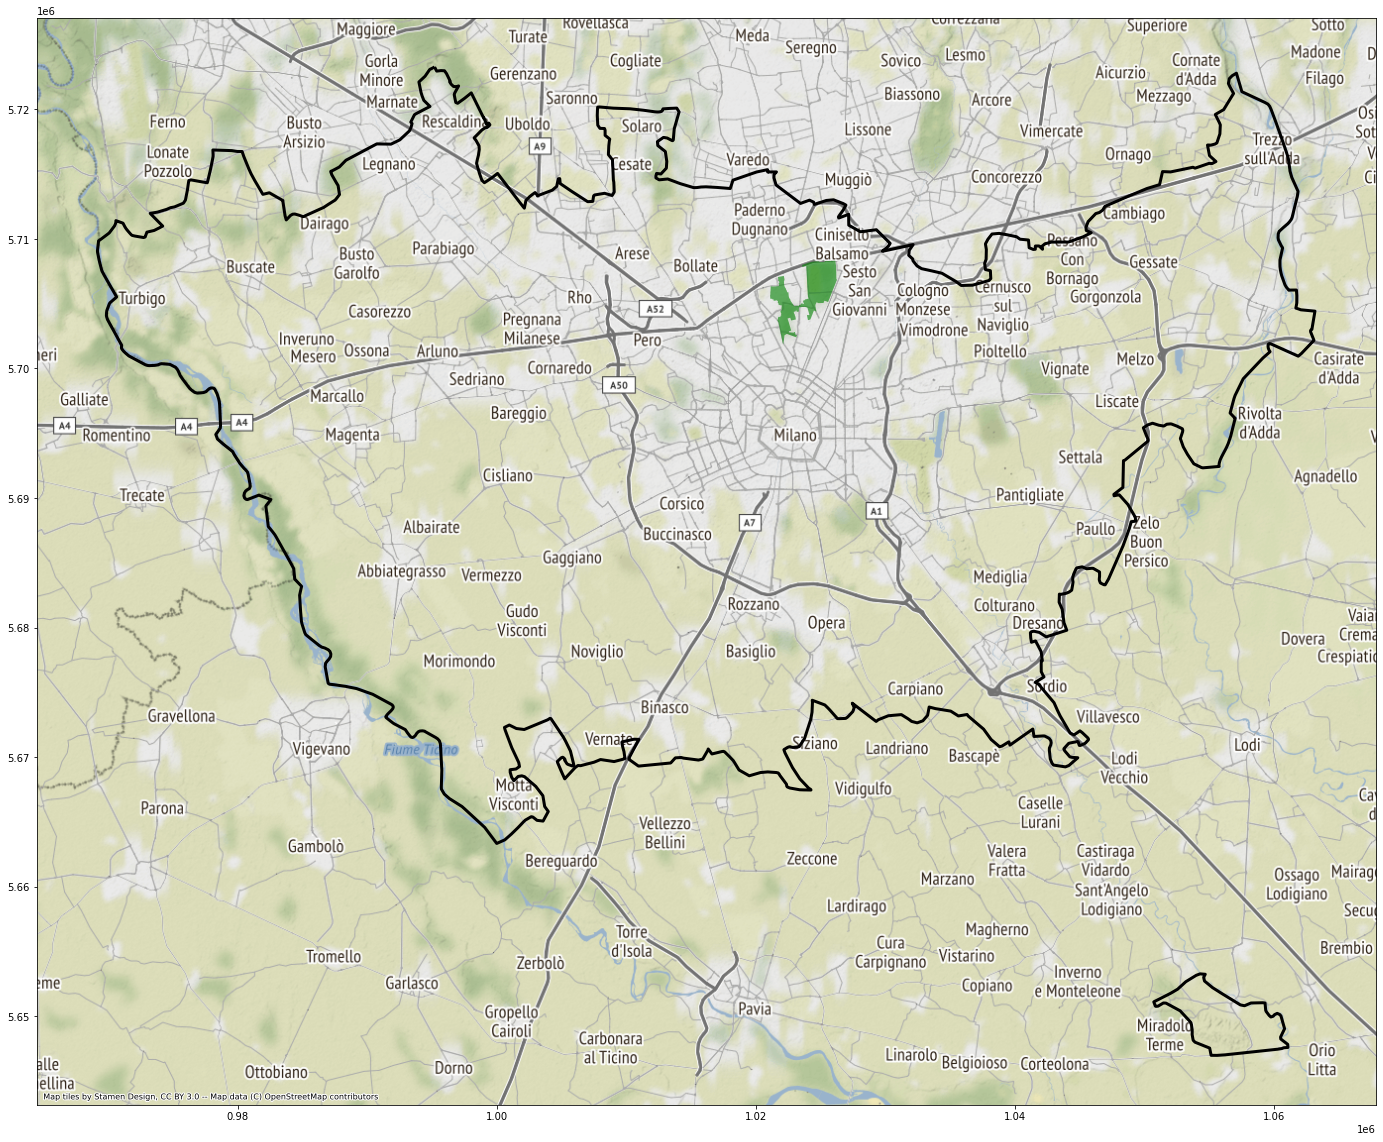

In [ ]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g")

parco = input("Inserisci il nome del parco: ")
mappa_parco = parchi[parchi.NOME == parco]
province_parco = province[province.intersects(mappa_parco.geometry.squeeze())]
mappa_parco2 = mappa_parco.intersects(lombardia.geometry.squeeze()).values

if len(mappa_parco2) == 0:
  print("il parco inserito non si trova in lombardia")
else: 
  ax = mappa_parco.to_crs(epsg=3857).plot(figsize=(30,20), alpha = 0.6, facecolor = "green")
  province_parco.to_crs(epsg=3857).plot(ax = ax, edgecolor = "k", facecolor = "none", linewidth = 3)
  ctx.add_basemap(ax)

5. dato un comune, avere i parchi che ospita (elenco e mappa)

In [ ]:
comune = input("Inserisci il nome del comune: ")
mappa_comune = comuni[comuni.COMUNE == comune]
parchi_comune = parchi[parchi.intersects(mappa_comune.geometry.squeeze())]
parchi_comune

Inserisci il nome del comune: Milano


FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...

[2 rows x 11 columns]

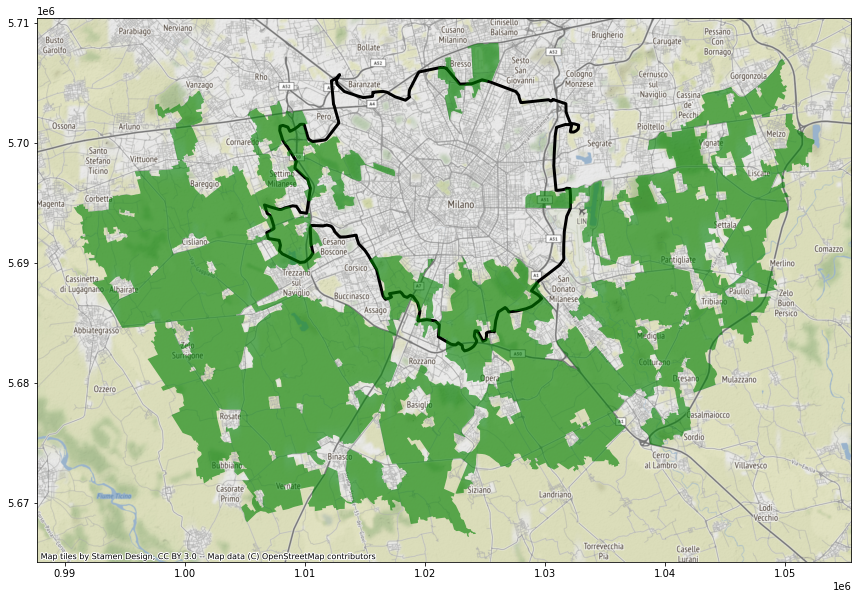

In [ ]:
ax = mappa_comune.to_crs(epsg=3857).plot(figsize=(20,10), edgecolor = "k", facecolor = "none", linewidth = 3)
parchi_comune.to_crs(epsg=3857).plot(ax = ax, alpha = 0.6, facecolor = "green")
ctx.add_basemap(ax)

6. dato il nome di una provincia, avere i parchi che ospita (elenco e mappa)

In [ ]:
provincia = input("Inserisci il nome della provincia: ")
mappa_provincia = province[province.DEN_UTS == provincia]
parchi_provincia = parchi[parchi.intersects(mappa_provincia.geometry.squeeze())]
parchi_provincia

Inserisci il nome della provincia: Milano


FID  ...                                           geometry
8     9  ...  POLYGON ((533258.682 5067541.607, 533248.433 5...
9    15  ...  POLYGON ((476666.268 5067282.167, 476899.067 5...
18   19  ...  POLYGON ((507798.216 5051185.214, 507708.842 5...
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...
22   23  ...  POLYGON ((540167.544 5038793.618, 540195.043 5...
24   25  ...  POLYGON ((507743.475 5029863.193, 507763.882 5...

[7 rows x 11 columns]

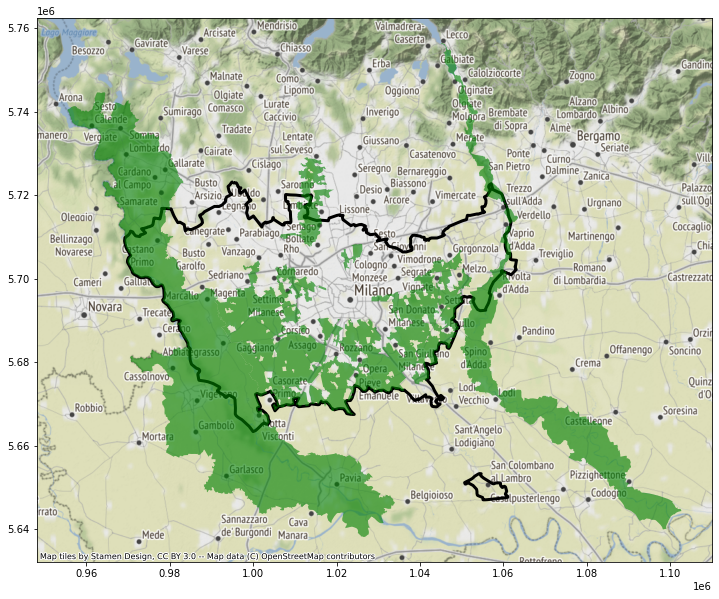

In [ ]:
ax = mappa_provincia.to_crs(epsg=3857).plot(figsize=(20,10), edgecolor = "k", facecolor = "none", linewidth = 3)
parchi_provincia.to_crs(epsg=3857).plot(ax = ax, alpha = 0.6, facecolor = "green")
ctx.add_basemap(ax)